## COBRA Visualisations

This notebook will cover the visulaisation and plotting offered by pycobra.

In [1]:
%matplotlib inline
import numpy as np
from pycobra.cobra import Cobra
from pycobra.ewa import Ewa
from pycobra.visualisation import Visualisation
from pycobra.diagnostics import Diagnostics

In [2]:
# setting up our random data-set
rng = np.random.RandomState(42)

# D1 = train machines; D2 = create COBRA; D3 = calibrate epsilon, alpha; D4 = testing
n_features = 2
D1, D2, D3, D4 = 200, 200, 200, 200
D = D1 + D2 + D3 + D4
X = rng.uniform(-1, 1, D * n_features).reshape(D, n_features)
# Y = np.power(X[:,1], 2) + np.power(X[:,3], 3) + np.exp(X[:,10]) 
Y = np.power(X[:,0], 2) + np.power(X[:,1], 3)

# training data-set
X_train = X[:D1 + D2]
X_test = X[D1 + D2 + D3:D1 + D2 + D3 + D4]
X_eps = X[D1 + D2:D1 + D2 + D3]
# for testing
Y_train = Y[:D1 + D2]
Y_test = Y[D1 + D2 + D3:D1 + D2 + D3 + D4]
Y_eps = Y[D1 + D2:D1 + D2 + D3]

# set up our COBRA machine with the data
cobra = Cobra(epsilon=0.5)
cobra.fit(X_train, Y_train)

Cobra(epsilon=0.5, machines=None, random_state=None)

### Plotting COBRA

We use the visualisation class to plot our results, and for various visualisations.

In [3]:
cobra_vis = Visualisation(cobra, X_test, Y_test)

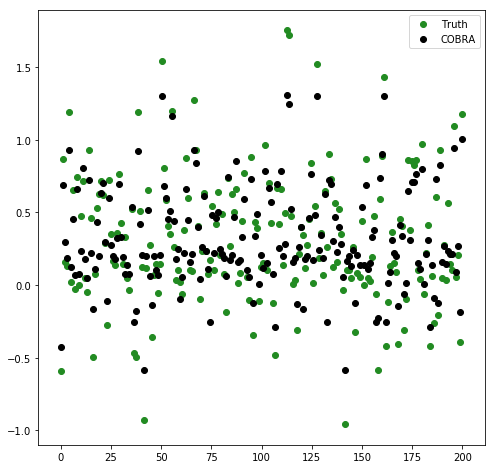

In [4]:
# to plot our machines, we need a linspace as input. This is the 'scale' to plot and should be the range of the results
# since our data ranges from -1 to 1 it is such - and we space it out to a hundred points
cobra_vis.plot_machines(machines=["COBRA"])

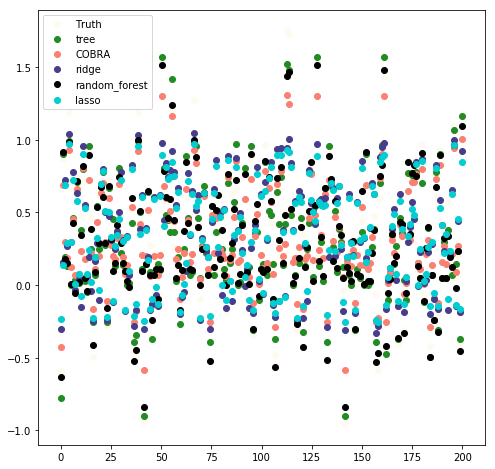

In [5]:
cobra_vis.plot_machines()

### Plots and Visualisations of Results

QQ and Boxplots!

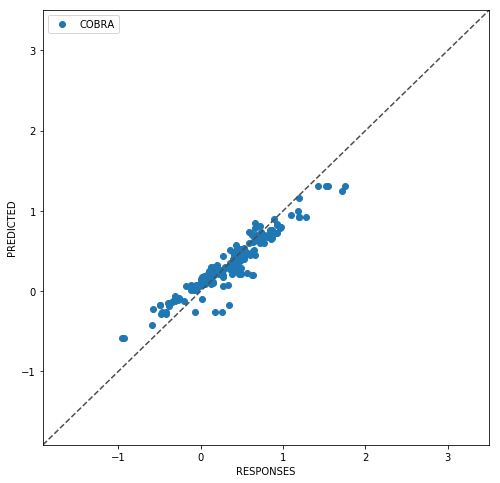

In [6]:
cobra_vis.QQ()

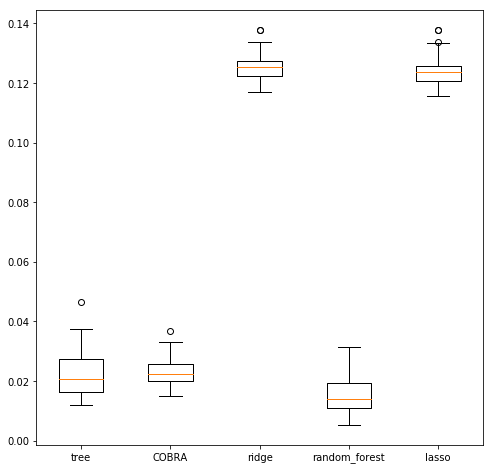

In [7]:
cobra_vis.boxplot()

### Plotting EWA!

We can use the same visualisation class for seeing how EWA works. Let's demonstrate this!

In [8]:
ewa = Ewa()
ewa.set_beta(X_beta=X_eps, y_beta=Y_eps)
ewa.fit(X_train, Y_train)

Ewa(beta=0.01, random_state=None)

In [9]:
ewa_vis = Visualisation(ewa, X_test, Y_test)

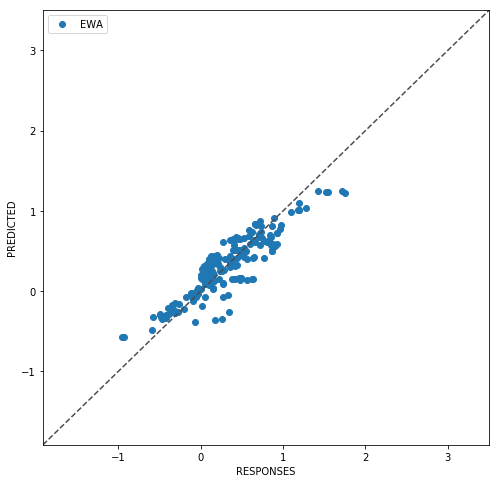

In [10]:
ewa_vis.QQ("EWA")

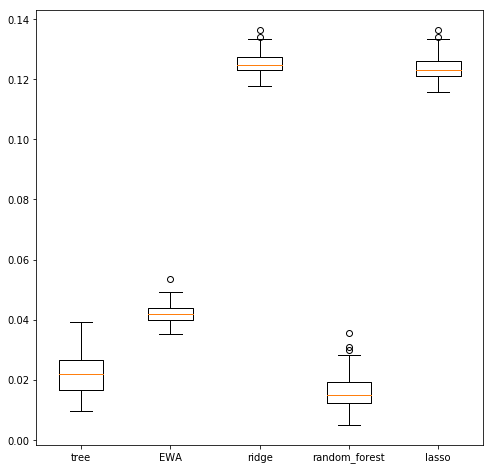

In [11]:
ewa_vis.boxplot()

### Plotting ClassifierCobra

In [12]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from pycobra.classifiercobra import ClassifierCobra

bc = datasets.load_breast_cancer()
X_cc = bc.data[:-40]
y_cc = bc.target[:-40]
X_cc_test = bc.data[-40:]
y_cc_test = bc.target[-40:]

In [13]:
cc = ClassifierCobra()

In [14]:
cc.fit(X_cc, y_cc)

/Users/bhargavvader/open_source/pycobra/venv/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ClassifierCobra(random_state=None)

In [15]:
cc_vis = Visualisation(cc, X_cc_test, y_cc_test)

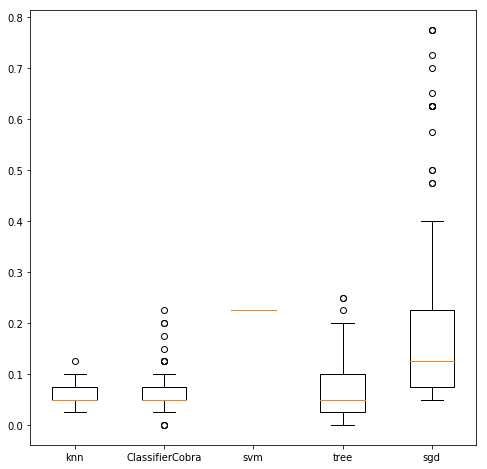

In [16]:
cc_vis.boxplot()

Remember that all the estimators in the Pycobra package are scikit-learn compatible - we can also use the scikit-learn metrics and tools to analyse our machines!

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_cc_test, cc.predict(X_cc_test)))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90         9
          1       1.00      0.94      0.97        31

avg / total       0.96      0.95      0.95        40



### Plotting COBRA colors!

We're now going to experiment with plotting colors and data.
After we get information about which indices are used by which machines the best for a fixed epsilon (or not, we can toggle this option), we can plot the distribution of machines. 

Why is this useful? Since we're dealing with a 2-D space now, we're attempting to see if there are some parts in the input space which are picked up by certain machines. This could lead to interesting experiments and 

We first present a plot where the machine colors are mixed depending on which machines were selected; after which we plot one machine at a time.

In [18]:
indices, MSE = cobra_vis.indice_info(X_test=X_eps[0:50], y_test=Y_eps[0:50], epsilon=0.50)

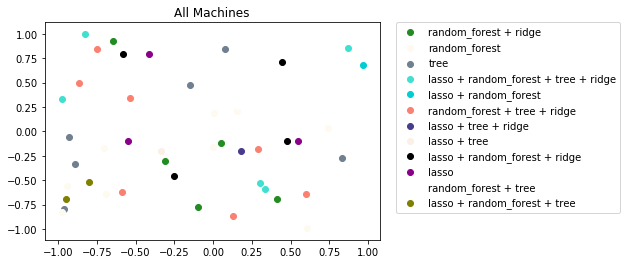

In [19]:
cobra_vis.color_cobra(X_test=X_eps[0:50], indice_info=indices, single=True)

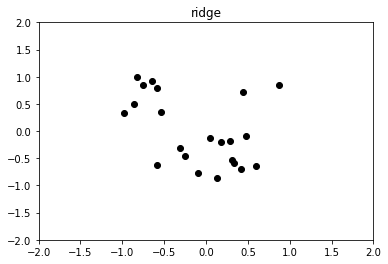

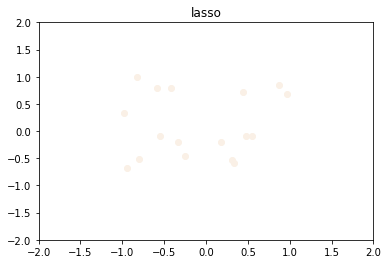

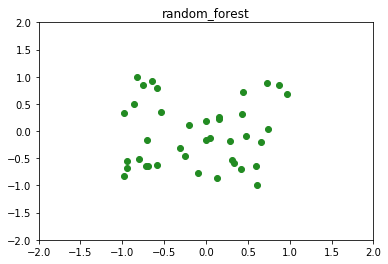

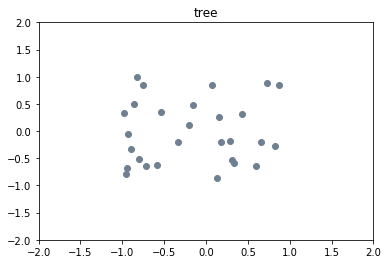

In [20]:
cobra_vis.color_cobra(X_test=X_eps[0:50], indice_info=indices)

### Voronoi Tesselation

We present a variety of Voronoi Tesselation based plots - the purpose of this is to help in visualising the pattern of points which tend to be picked up.

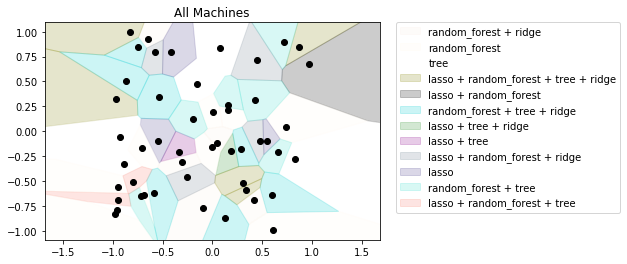

In [21]:
cobra_vis.voronoi(X_test=X_eps[0:50], indice_info=indices, single=True)

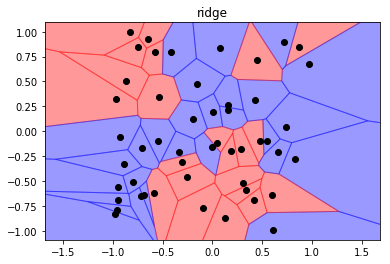

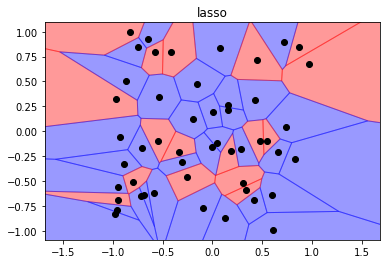

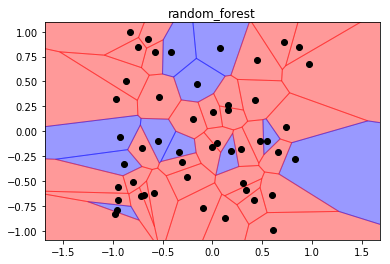

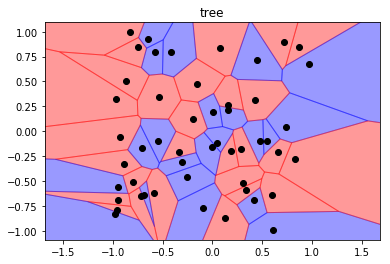

In [22]:
cobra_vis.voronoi(X_test=X_eps[0:50], indice_info=indices)

### Gradient-Colored Based Voronoi



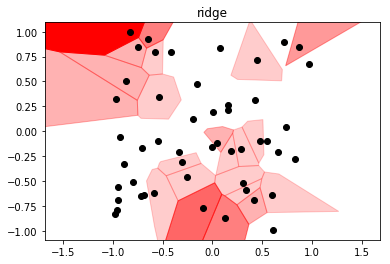

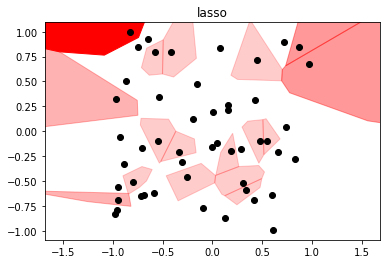

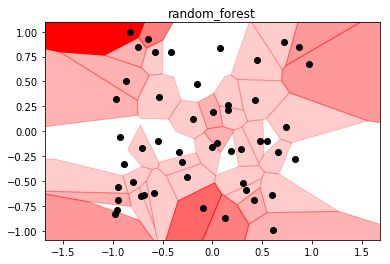

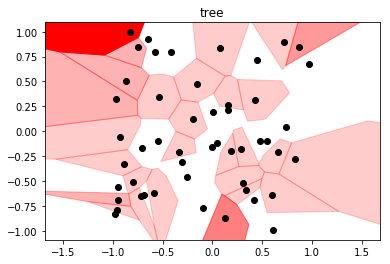

In [23]:
cobra_vis.voronoi(X_test=X_eps[0:50], indice_info=indices, MSE=MSE, gradient=True)

Licensed under the MIT License - https://opensource.org/licenses/MIT